<h2 style='color:blue' align='center'>Small Image Classification Using Support Vector Machine (SVM)</h2>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 9s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
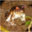

In [5]:
X_train[0]

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalize the images

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

* #####  RGB images have three channels, which significantly increases the dimensionality of the data. Converting to grayscale reduces the data to a single channel, simplifying the computation and reducing memory usage.
* ##### HOG features are based on gradients (changes in intensity) within the image. In a grayscale image, the gradient computation is straightforward since it only needs to consider intensity changes in one channel. In contrast, computing gradients for RGB images involves handling gradients in three channels and combining them, which is more complex and computationally intensive.

#### Convert images to grayscale since HOG works on single channel images

In [7]:
X_train_gray = np.array([rgb2gray(image) for image in X_train])
X_test_gray = np.array([rgb2gray(image) for image in X_test])

#### Extract HOG features from the grayscale images

In [8]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(features)
    return np.array(hog_features)


In [9]:
X_train_hog = extract_hog_features(X_train_gray)
X_test_hog = extract_hog_features(X_test_gray)

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()


#### Train an SVM classifier

In [10]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_hog, y_train)

SVC(kernel='linear', random_state=42)

In [11]:

# Predict on the test set
y_pred = svm.predict(X_test_hog)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Test accuracy: 52.99%


In [12]:
y_pred[:5]

array([6, 8, 1, 0, 6], dtype=uint8)

In [13]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)